In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
%matplotlib inline
from imutils.video import count_frames
from scipy.spatial import distance as dist

In [2]:
import pandas as pd

In [3]:
#%matplotlib notebook

 # Video i/p 

In [4]:
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/Export_2019-12-18_181852/0 - 2019-12-18 17-56-37-496.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/New Slab/Export_2019-12-19_124059/0 - 2019-12-19 07-01-00-394.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/day-4 data/0 - 2019-12-19 19-35-05-273.mov")

cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/data from tata-14_V2/0 - 2020-02-10 19-16-01-033.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Downloads/VID-20200106-WA0003.mp4")

#cap = cv2.VideoCapture("C:/Users/shrin/Desktop/openpose-master/openpose-master/build/examples/tutorial_api_python/abhilash.mov")
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
totalFrames

1475.0

In [5]:
cap.set(cv2.CAP_PROP_POS_FRAMES,350)

True

In [6]:
%matplotlib notebook

In [7]:
bg = cv2.imread("4MP_v2_withoutslab.jpg",0) 

(1520, 2592, 3)
(1520, 2592, 3)


<IPython.core.display.Javascript object>


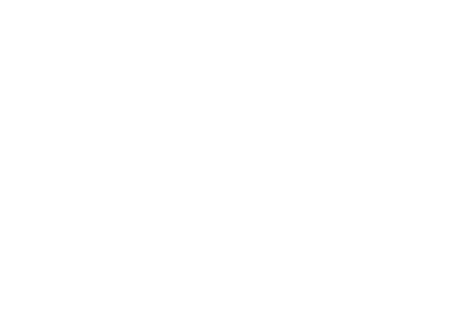

In [8]:
ret, frame = cap.read()
#imgIP = "refImage.jpg"
#frame = cv2.imread(imgIP)
#frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
#test = frame.copy()
print(frame.shape)
#plt.figure(figsize=(10,12))
#resized = cv2.resize(frame,(frame.shape[1]*2,frame.shape[0]*2), interpolation=cv2.INTER_LINEAR)
#print(frame.shape)
#frame = cv2.resize(frame,(frame.shape[1]*2,frame.shape[0]*2), cv2.INTER_AREA)
print(frame.shape)
plt.imshow(frame)

In [9]:
#cv2.imwrite("4MP_v2_withoutslab.jpg",frame)

In [10]:
339,1120,2142,1120

(339, 1120, 2142, 1120)

In [11]:
#frame[:,2122:] = 0 
frame[:,1850:] = 0

In [12]:
plt.imshow(frame)

In [13]:
[358,1200,1958,1200]

[308,888,1455,888]
#%matplotlib notebook

[308, 888, 1455, 888]

In [14]:
#cv2.imwrite("toTatat1.jpg",frame)

In [15]:
#%matplotlib notebook

# pixels Per Metric

In [16]:
#alar = [682,708,1095,685]
#alar = [510-9,800,1126-9,800]
#alar = [308,651,1203,651]
#alar = [257,647,1390,647]
#alar = [162,647,1548,647]
#alar = [325,1259,3111,1259] # 2x
#alar = [176,771,1330,771]
#alar = [313,888,1455 - 20,888]

#alar = [313,888-100,1455 - 20,888-100]



alar = [358,1200 - 150 +20 ,1958,1200 - 150 +20  ] # 4mp
alar = [339,1120 -150 ,2142,1120 - 150] # 4MP_v2



bg[alar[1]:] = 0 

In [17]:
#drawLine = frame.copy()

dB = dist.euclidean(alar[:2],alar[-2:])
pixelsPerMetric = dB / 1690
print(1/pixelsPerMetric,"<<<<<-----------------MM per Pix")


0.93732667775929 <<<<<-----------------MM per Pix


In [18]:
img = cv2.cvtColor(frame.copy(),cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(img.copy()) 
hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
hh,s,v = cv2.split(hsv)
yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
y,u,vb = cv2.split(yuv)


hls = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HLS)
h,l,ss = cv2.split(hls)

#randv = np.dstack((r,v),)
randv = cv2.addWeighted(y, -1.56, r, 2.8, 0.0)
print(randv.shape)

dst = cv2.addWeighted(y, 0, randv, 1.3, 0.0)
dst = cv2.line(dst,(alar[0],alar[1]),(alar[2],alar[3]),255,13)
#dst = cv2.addWeighted(v, .02, r, 1.6, 0.0)
print(dst.shape,"<- - dst")
plt.imshow(dst)

(1520, 2592)
(1520, 2592) <- - dst


In [19]:
%matplotlib notebook

In [20]:
print(time.localtime(0))

time.struct_time(tm_year=1970, tm_mon=1, tm_mday=1, tm_hour=5, tm_min=30, tm_sec=0, tm_wday=3, tm_yday=1, tm_isdst=0)


In [21]:
import csv

In [22]:
leftCor = []
rightCor = []
save = []
while(True):
    ret, img = cap.read()
    
    #img = cv2.resize(img,(img.shape[1] ,img.shape[0] ), cv2.INTER_AREA)
    
     
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # BG SUB
    #bgsub = cv2.absdiff(gray,bg)
    
    b,g,r = cv2.split(img.copy()) 
    #hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
    #h,s,v = cv2.split(hsv)
    yuv = cv2.cvtColor(img.copy(),cv2.COLOR_BGR2YUV)
    y,u,vb = cv2.split(yuv)
    
    randv = cv2.addWeighted(r, .5, b, 3.0, 0.0)  #good 220
    #print(randv.shape)
    
    #bgsub = cv2.absdiff(bg,randv)
    
    #randv = cv2.addWeighted(y, -1.56 , r, 2.9, 0.0)
    dst = cv2.addWeighted(y, 0.005, randv, 1.5, 0.0)
    #dst = cv2.addWeighted(v, .02, r, 1.251, 0.0) # threh 190
    
    bgsub = cv2.absdiff(bg,dst)
    
    blur = cv2.GaussianBlur(bgsub,(3,3),0)
    
    
    _,thresh = cv2.threshold(blur,168,255,cv2.THRESH_BINARY )
    #thresh[:,2122:] = 0
    #thresh[:,1850:] = 0
    #thresh[:,:200] = 0
    
    
    val = alar[1]
    
    
    """---------------------------------------------------------------------------------------------------------"""
    
    x1 = gray[val:] - bgsub[val:]
    #print(x1,"<-")
    
    
    """---------------------------------------------------------------------------------------------------------"""
    
    
    #img = cv2.line(img ,(alar[0],alar[1]),(alar[2],alar[3]),(255,5,0),3)
    if np.count_nonzero(thresh[val-5,]) >= 500:
        leftSide = np.nonzero(thresh[val,])[0][0] 
        rightSide = np.nonzero(thresh[val,])[0][-1] 
        leftCor.append(leftSide)
        rightCor.append(rightSide)
        #print(np.count_nonzero(thresh[816,]))
        mmPpix = ((1/pixelsPerMetric)* (rightSide - leftSide)) 
        print(mmPpix,",_______________________________")
        print("leftSide = ",leftSide,"rightSide = ", rightSide)
        print(blur[val,][leftSide :rightSide ])
        
        img  = cv2.line(img ,(np.nonzero(thresh[val,])[0][0] ,alar[1]),((np.nonzero(thresh[val,])[0][-1]) ,alar[3]),(255),2)
        
        #img = cv2.line(img ,(alar[0],alar[1]),(alar[2],alar[3]),(255,5,0),3)
        
        img = cv2.circle(img,(leftSide,alar[1]) , 1, 0, 5)
        img = cv2.circle(img,(rightSide,alar[3]) , 1, 0, 5)
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        img = cv2.putText(img,"{} mm".format(mmPpix),(0,330), font, 1.2 , (200,255,155), 2 , cv2.LINE_AA)
        
        #------------------------------------to csv--------------------------------------------#
        #mmPpix_time = pd.DataFrame([[int(mmPpix),time.asctime( time.localtime(time.time()))]])
        
        #mmPpix_time.to_csv('testData.csv', mode='a+', header=False,index=False)
        '''with open('testData.csv', 'a+', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(mmPpix_time)'''
        
    
    #img1 = cv2.resize(img ,(int(1920),int(1080)))
    #img2 = cv2.resize(dstCnt,(500,300))
    #img3 = cv2.resize(thresh,(500,300))
    #save.append(img1)
    #img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    img1 = cv2.resize(img ,(int(1920),int(1080)))
    thresh1 = cv2.resize(thresh ,(int(1920),int(1080)))
    bgsub1 = cv2.resize(bgsub ,(int(1920),int(1080)))
    cv2.imshow('img ',thresh1)
    cv2.imshow('imgzzz ',img1)
    cv2.imshow('img ',bgsub1)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

[[163 163 153 ... 111 179  70]
 [158 158 149 ... 175 145 133]
 [158 158 149 ... 104 104 104]
 ...
 [ 60  68 107 ...  86 100 112]
 [ 97  76  63 ... 100 107 120]
 [ 66  64  59 ...  86 107 120]] <-
2423.926788685524 ,_______________________________
leftSide =  5 rightSide =  2591
[197 229 240 ... 175 159 165]
[[163 163 153 ... 111 179  70]
 [158 158 149 ... 175 145 133]
 [158 158 149 ... 104 104 104]
 ...
 [ 69  86 125 ... 107 117 129]
 [115  94  63 ... 124 129 141]
 [ 66  64  74 ... 107 129 141]] <-
2423.926788685524 ,_______________________________
leftSide =  5 rightSide =  2591
[197 229 240 ... 175 159 165]
[[190 190 180 ... 111 179  70]
 [185 185 176 ... 175 145 133]
 [185 185 176 ... 104 104 104]
 ...
 [ 65  77 132 ... 107 117 129]
 [132 103  65 ... 124 129 141]
 [ 81  69  64 ... 107 129 141]] <-
2423.926788685524 ,_______________________________
leftSide =  5 rightSide =  2591
[172 210 226 ... 175 159 165]
[[190 190 180 ... 111 179  70]
 [185 185 176 ... 175 145 133]
 [185 185 176 

2422.989462007765 ,_______________________________
leftSide =  6 rightSide =  2591
[202 233 228 ... 190 176 182]
[[197 207 193 ... 118 135  76]
 [197 176 202 ... 138 121 130]
 [207 112 231 ... 104  91  62]
 ...
 [139 118 115 ... 107 175 170]
 [122 122  76 ...  90 129 132]
 [105 166 135 ... 112 102  90]] <-
2422.989462007765 ,_______________________________
leftSide =  6 rightSide =  2591
[202 233 228 ... 190 176 182]
[[197 207 193 ... 145 162  76]
 [197 176 202 ... 165 148 157]
 [207 112 231 ... 131 118  89]
 ...
 [118  96  91 ... 107 175 170]
 [101 101  55 ...  90 129 132]
 [ 84 142 113 ... 112 102  90]] <-
2422.989462007765 ,_______________________________
leftSide =  6 rightSide =  2591
[202 233 228 ... 165 151 159]
[[100 139 176 ... 145 162  76]
 [244 210 210 ... 165 148 157]
 [207 112 231 ... 131 118  89]
 ...
 [143 123 118 ... 107 175 170]
 [ 96  96  59 ...  90 129 132]
 [ 67 126  96 ... 112 102  90]] <-
2422.989462007765 ,_______________________________
leftSide =  6 rightSide =

[[124 136 153 ... 102 163  67]
 [115 136 158 ... 136 158 166]
 [163 158 153 ... 163 102 146]
 ...
 [ 59  56  53 ... 203  96 130]
 [ 67  67  67 ... 135 159  79]
 [ 79  87  84 ... 193  91  91]] <-
2423.926788685524 ,_______________________________
leftSide =  5 rightSide =  2591
[188 225 239 ... 196 178 167]
[[149 163 180 ... 102 163  67]
 [141 163 183 ... 136 158 166]
 [141 136 132 ... 163 102 146]
 ...
 [ 59  56  73 ... 176  96 142]
 [ 85  85  85 ...  57 169 142]
 [ 98 107 102 ...  53 104 181]] <-
2423.926788685524 ,_______________________________
leftSide =  5 rightSide =  2591
[184 223 239 ... 196 178 167]
[[149 163 170 ... 102 163  67]
 [141 163 170 ... 136 158 166]
 [146  64  95 ... 163 102 146]
 ...
 [ 59  56  73 ... 176  96 142]
 [ 85  85  85 ...  57 169 142]
 [ 98 107 102 ...  53 104 181]] <-
2423.926788685524 ,_______________________________
leftSide =  5 rightSide =  2591
[190 228 240 ... 196 178 167]
[[149 170 163 ... 129 190  74]
 [146 163 153 ... 163 185 193]
 [146 170  98 

[[141 155 213 ...  85 107  84]
 [175 175  99 ... 170 153 146]
 [192 189 179 ... 163 102 146]
 ...
 [ 52  47  47 ... 155  87 124]
 [ 47  38  59 ...  87 150  90]
 [ 47  31  66 ... 145  87 107]] <-
2425.8014420410427 ,_______________________________
leftSide =  3 rightSide =  2591
[173 192 194 ... 184 173 181]
[[141 155 213 ...  85 107  84]
 [175 175  99 ... 170 153 146]
 [192 189 179 ... 163 102 146]
 ...
 [ 88 110 105 ... 167  99 138]
 [ 78 116  60 ...  99 163 104]
 [ 78 146  67 ... 160  99 121]] <-
2425.8014420410427 ,_______________________________
leftSide =  3 rightSide =  2591
[173 192 194 ... 184 173 181]
[[141 155 213 ...  85 107  84]
 [175 175  99 ... 170 153 146]
 [192 189 179 ... 163 102 146]
 ...
 [105 127 122 ... 177 121 163]
 [ 96 134  60 ...  61 172 138]
 [ 96 164  67 ...  95 104 160]] <-
2425.8014420410427 ,_______________________________
leftSide =  3 rightSide =  2591
[173 192 194 ... 184 173 181]
[[141 155 213 ...  85 107  84]
 [175 175  99 ... 170 153 146]
 [192 189 1

[[188 188 168 ...  95  78  73]
 [180 180 163 ... 141 149 153]
 [168 168 158 ... 146 107  85]
 ...
 [114 136 144 ... 163  90 180]
 [119 141 119 ...  66 180 134]
 [ 74 102 158 ... 120 120 163]] <-
2423.926788685524 ,_______________________________
leftSide =  5 rightSide =  2591
[192 228 240 ... 175 183 194]
[[221 221 199 ... 125 108 104]
 [212 212 195 ... 172 181 186]
 [199 199 192 ... 176 138 118]
 ...
 [114 136 144 ... 163  90 180]
 [119 141 119 ...  66 180 134]
 [ 74 102 158 ... 120 120 163]] <-
2422.989462007765 ,_______________________________
leftSide =  6 rightSide =  2591
[202 224 221 ... 144 152 163]
[[221 221 199 ... 125 108 104]
 [212 212 195 ... 172 181 186]
 [199 199 192 ... 176 138 118]
 ...
 [141 163 175 ... 163  90 180]
 [146 168 146 ...  66 180 134]
 [ 74 129 185 ... 120 120 163]] <-
2422.989462007765 ,_______________________________
leftSide =  6 rightSide =  2591
[202 224 221 ... 144 152 163]
[[221 221 199 ... 125 108 104]
 [212 212 195 ... 172 181 186]
 [199 199 192 

[[215 220 203 ... 125  95 105]
 [189 193 198 ... 125 156 190]
 [164 172 186 ... 231 219 197]
 ...
 [152 198  96 ... 207 202 178]
 [164 198  74 ... 215 215 185]
 [125 186  60 ... 215 198 161]] <-
2422.989462007765 ,_______________________________
leftSide =  6 rightSide =  2591
[200 221 215 ... 118 150 171]
[[215 220 203 ...  90  63  70]
 [189 193 198 ...  90 121 155]
 [164 172 186 ... 196 184 162]
 ...
 [152 198  96 ... 207 202 178]
 [164 198  74 ... 215 215 185]
 [125 186  60 ... 215 198 161]] <-
2422.989462007765 ,_______________________________
leftSide =  6 rightSide =  2591
[200 221 215 ... 154 186 206]
[[215 220 203 ...  90  63  70]
 [189 193 198 ...  90 121 155]
 [164 172 186 ... 196 184 162]
 ...
 [159 198  91 ... 207 202 178]
 [152 193  67 ... 215 215 185]
 [121 186  60 ... 215 198 161]] <-
2422.989462007765 ,_______________________________
leftSide =  6 rightSide =  2591
[200 221 215 ... 154 186 206]
[[215 220 203 ... 125  95 105]
 [189 193 198 ... 125 156 190]
 [164 172 186 

[[226 226 218 ... 124  98  71]
 [235 235 226 ... 180 251 248]
 [203 203 212 ...  73 183 180]
 ...
 [166 183 173 ... 192 218 240]
 [ 95 163 143 ... 158 206 230]
 [ 78 167 143 ... 138 184 209]] <-
2419.2401552967276 ,_______________________________
leftSide =  8 rightSide =  2589
[181 186 181 ...  90 136 189]
[[229 229 219 ... 124  98  71]
 [236 241 232 ... 180 251 248]
 [222 219 229 ...  73 183 180]
 ...
 [144 161 152 ... 192 218 240]
 [116 184 163 ... 158 206 230]
 [ 54 167 228 ... 138 184 209]] <-
2228.0255130338323 ,_______________________________
leftSide =  212 rightSide =  2589
[176 202 217 ...  90 136 189]
[[229 229 219 ... 124  98  71]
 [236 241 232 ... 180 251 248]
 [222 219 229 ...  73 183 180]
 ...
 [155  92  78 ... 179 206 226]
 [137 123  52 ... 158 206 230]
 [ 69 132 120 ... 138 184 209]] <-
2228.0255130338323 ,_______________________________
leftSide =  212 rightSide =  2589
[176 202 217 ... 138 174 202]
[[229 229 219 ... 124  98  71]
 [236 241 232 ... 180 251 248]
 [222 2

[[221 192 255 ...   0   0 122]
 [216 243 216 ... 202   0 255]
 [221 216 199 ... 190 224 207]
 ...
 [255 204 178 ... 184 180 177]
 [243 243 221 ... 194 194 189]
 [  3 238 216 ... 194 194 189]] <-
[[221 192 255 ... 219  74  74]
 [216 243 216 ... 231   1   1]
 [221 216 199 ...   0   0   0]
 ...
 [220 172 152 ... 189 189 180]
 [210 198 176 ... 194 194 189]
 [223 210 189 ... 194 197 194]] <-
[[221 192 255 ... 236 142 100]
 [216 243 216 ...   2   1 255]
 [221 216 199 ... 146 173 173]
 ...
 [232 138 193 ... 189 189 180]
 [189 240 142 ... 194 194 189]
 [186   0 113 ... 194 197 194]] <-
[[221 192 255 ... 236 142 100]
 [216 243 216 ...   2   1 255]
 [221 216 199 ... 146 173 173]
 ...
 [223 186 172 ... 189 189 180]
 [206 206 176 ... 194 194 189]
 [220 220 181 ... 194 197 194]] <-
[[221 192 255 ... 236 142 100]
 [216 243 216 ...   2   1 255]
 [221 216 199 ... 146 173 173]
 ...
 [125 203 227 ... 189 189 180]
 [108 220 254 ... 194 194 189]
 [121 232   1 ... 194 197 194]] <-
[[221 226 209 ... 236 142

[[247 247 240 ... 177 114  88]
 [235 235 235 ... 194 187 199]
 [226 226 226 ... 207 253 233]
 ...
 [199 178 175 ... 205 222 222]
 [ 54  76 110 ... 195 195 195]
 [110 141 131 ... 178 178 178]] <-
[[247 247 240 ... 177 114  88]
 [235 235 235 ... 194 187 199]
 [226 226 226 ... 207 253 233]
 ...
 [231 231 219 ... 205 222 222]
 [214 214 214 ... 195 195 195]
 [214 214 214 ... 178 178 178]] <-
[[247 247 240 ... 210 145 120]
 [235 235 235 ... 227 217 230]
 [226 226 209 ... 239 254   0]
 ...
 [210 214 227 ... 208 222 222]
 [214 214 214 ... 208 222 222]
 [214 214 214 ... 205 222 222]] <-
[[247 247 240 ... 210 145 120]
 [235 235 235 ... 227 217 230]
 [226 226 209 ... 239 254   0]
 ...
 [210 219 227 ... 208 222 222]
 [214 214 207 ... 208 222 222]
 [214 214 202 ... 205 222 222]] <-
[[240 240 230 ... 210 145 120]
 [240 240 230 ... 227 217 230]
 [240 240 230 ... 239 254   0]
 ...
 [210 210 210 ... 208 222 222]
 [214 214 214 ... 208 222 222]
 [214 214 214 ... 205 222 222]] <-
[[240 240 230 ... 205 145

1904.6478092068774 ,_______________________________
leftSide =  233 rightSide =  2265
[173 204 192 ... 175 179 182]
[[241 254 245 ... 175 140 120]
 [241 254 245 ... 255   0 254]
 [241 254 245 ... 234 251 225]
 ...
 [210 210 206 ... 229 229 234]
 [210 210 206 ... 229 229 234]
 [210 210 206 ... 229 229 234]] <-
1805.2911813643925 ,_______________________________
leftSide =  234 rightSide =  2160
[180 160 132 ... 174 174 176]
[[241 254 245 ... 175 140 120]
 [241 254 245 ... 255   0 254]
 [241 254 245 ... 234 251 225]
 ...
 [210 210 201 ... 229 229 234]
 [210 210 201 ... 229 229 234]
 [210 210 201 ... 229 229 234]] <-
1805.2911813643925 ,_______________________________
leftSide =  234 rightSide =  2160
[180 160 132 ... 174 174 176]
[[241 254 245 ... 175 140 120]
 [241 254 245 ... 255   0 254]
 [241 254 245 ... 234 251 225]
 ...
 [210 210 201 ... 229 229 234]
 [210 210 201 ... 229 229 234]
 [210 210 201 ... 229 229 234]] <-
1903.710482529118 ,_______________________________
leftSide =  234 

[[241 241 241 ... 239 239 242]
 [241 241 241 ... 239 239 242]
 [241 241 236 ... 229 255 239]
 ...
 [202 202 202 ... 220 220 220]
 [202 202 202 ... 220 220 220]
 [202 202 202 ... 220 220 220]] <-
1859.6561286744313 ,_______________________________
leftSide =  305 rightSide =  2289
[171 175 181 ...  67  92 144]
[[241 241 241 ... 239 239 242]
 [241 241 241 ... 239 239 242]
 [241 241 236 ... 229 255 239]
 ...
 [211 216 223 ... 220 220 220]
 [240 228 206 ... 220 220 220]
 [ 97 165 189 ... 220 220 220]] <-
1859.6561286744313 ,_______________________________
leftSide =  305 rightSide =  2289
[171 175 181 ...  67  92 144]
[[241 241 241 ... 239 239 242]
 [241 241 241 ... 239 239 242]
 [241 241 236 ... 229 255 239]
 ...
 [243 251   0 ... 220 220 220]
 [248 251 238 ... 220 220 220]
 [129 200 231 ... 220 220 220]] <-
1858.718801996672 ,_______________________________
leftSide =  306 rightSide =  2289
[178 192 200 ... 127 141 159]
[[241 241 241 ... 208 254 253]
 [241 241 241 ... 200 254 254]
 [241 

1869.9667221297836 ,_______________________________
leftSide =  260 rightSide =  2255
[178 177 161 ... 118 127 167]
[[249 249 232 ... 200 251 253]
 [249 249 232 ... 166 254 254]
 [249 249 232 ...  76 195 188]
 ...
 [177 204 255 ... 220 220 220]
 [165 199 253 ... 220 220 220]
 [165 199 253 ... 220 220 220]] <-
1869.9667221297836 ,_______________________________
leftSide =  260 rightSide =  2255
[178 177 161 ... 118 127 167]
[[249 249 232 ... 200 251 253]
 [249 249 232 ... 166 254 254]
 [249 249 232 ...  76 195 188]
 ...
 [177 204 255 ... 220 220 220]
 [165 199 253 ... 220 220 220]
 [165 199 253 ... 220 220 220]] <-
1869.9667221297836 ,_______________________________
leftSide =  260 rightSide =  2255
[178 177 161 ... 118 127 167]
[[249 249 232 ... 159 210 252]
 [249 249 232 ... 125 227 244]
 [249 249 232 ...  55 156 146]
 ...
 [205 205 210 ... 233 233 208]
 [193 198 201 ... 220 220 220]
 [193 198 201 ... 220 220 220]] <-
1869.9667221297836 ,_______________________________
leftSide =  260

[[246 246 238 ... 208 208 212]
 [238 238 233 ... 208 208 222]
 [238 238 238 ... 217 212 239]
 ...
 [208 208 208 ... 217 239 171]
 [208 208 208 ...  94   0 210]
 [208 208 208 ...  81 230   0]] <-
1704.0599001663893 ,_______________________________
leftSide =  280 rightSide =  2098
[178 176 159 ... 245 245 239]
[[246 246 238 ... 208 208 212]
 [238 238 233 ... 208 208 222]
 [238 238 238 ... 217 212 239]
 ...
 [225 225 220 ... 217 239 171]
 [216 216 216 ...  94   0 210]
 [216 216 216 ...  81 230   0]] <-
1704.0599001663893 ,_______________________________
leftSide =  280 rightSide =  2098
[178 176 159 ... 245 245 239]
[[246 246 238 ... 212 188 191]
 [238 238 233 ... 229 191 191]
 [238 238 238 ... 242 178 171]
 ...
 [225 225 220 ... 196 213 154]
 [216 216 216 ... 213 227 159]
 [216 216 216 ... 188 244 176]] <-
1704.9972268441486 ,_______________________________
leftSide =  280 rightSide =  2099
[178 176 159 ... 245 245 241]
[[246 246 238 ... 242 178 171]
 [238 238 233 ... 246 174 154]
 [238

[[238 233 229 ... 222 225 225]
 [238 238 238 ... 225 229 222]
 [224 224 229 ... 222 222 222]
 ...
 [216 216 213 ... 227 213 200]
 [216 216 216 ... 222 205 196]
 [216 216 216 ... 230 200 166]] <-
1704.9972268441486 ,_______________________________
leftSide =  280 rightSide =  2099
[178 176 159 ... 245 245 242]
[[238 233 229 ... 222 225 225]
 [238 238 238 ... 225 229 222]
 [224 224 229 ... 222 222 222]
 ...
 [216 216 213 ... 227 213 200]
 [216 216 216 ... 222 205 196]
 [216 216 216 ... 230 200 166]] <-
1704.9972268441486 ,_______________________________
leftSide =  280 rightSide =  2099
[178 176 159 ... 245 245 243]
[[241 241 234 ... 250 250 221]
 [241 241 234 ... 255 255 254]
 [241 241 234 ... 229 255 246]
 ...
 [208 217 212 ... 234 234 229]
 [217 217 212 ... 242 242 239]
 [217 217 212 ... 229 242 239]] <-
1674.0654464780919 ,_______________________________
leftSide =  312 rightSide =  2098
[183 204 225 ... 245 245 235]
[[241 241 234 ... 250 250 221]
 [241 241 234 ... 255 255 254]
 [241

1676.8774265113698 ,_______________________________
leftSide =  312 rightSide =  2101
[183 204 225 ... 245 236 214]
[[ 67  67  81 ... 255   0   0]
 [255 255 255 ... 246 255 255]
 [241 241 234 ... 243 246 246]
 ...
 [208 217 212 ... 225 239 195]
 [217 217 212 ... 225 239 195]
 [217 217 212 ... 229 229 225]] <-
1676.8774265113698 ,_______________________________
leftSide =  312 rightSide =  2101
[183 204 225 ... 245 236 214]
[[ 67  67  81 ... 255   0   0]
 [255 255 255 ... 246 255 255]
 [241 241 234 ... 243 246 246]
 ...
 [208 217 212 ... 225 239 195]
 [217 217 212 ... 225 239 195]
 [217 217 212 ... 229 229 225]] <-
1676.8774265113698 ,_______________________________
leftSide =  312 rightSide =  2101
[183 204 225 ... 245 236 214]
[[ 67  67  81 ... 226 226 226]
 [255 255 255 ... 216 212 216]
 [241 241 234 ... 221 216 216]
 ...
 [208 217 212 ... 225 239 195]
 [217 217 212 ... 225 239 195]
 [217 217 212 ... 229 229 225]] <-
1676.8774265113698 ,_______________________________
leftSide =  312

[[239 239 231 ... 240 240   1]
 [239 239 231 ... 247 230 196]
 [239 239 231 ... 252 226 240]
 ...
 [214 214 219 ... 222 222 222]
 [214 214 219 ... 222 222 222]
 [214 214 219 ... 222 222 222]] <-
1675.0027731558512 ,_______________________________
leftSide =  314 rightSide =  2101
[174 187 202 ... 238 232 220]
[[239 239 231 ... 243 235 240]
 [239 239 231 ... 240 240 240]
 [239 239 231 ... 240 240 240]
 ...
 [214 214 219 ... 222 222 222]
 [214 214 219 ... 222 222 222]
 [214 214 219 ... 222 222 222]] <-
1675.0027731558512 ,_______________________________
leftSide =  314 rightSide =  2101
[174 187 202 ... 238 232 220]
[[239 239 231 ... 240 240 240]
 [239 239 231 ... 240 240 240]
 [239 239 231 ... 240 240 240]
 ...
 [214 214 219 ... 222 222 222]
 [214 214 219 ... 222 222 222]
 [214 214 219 ... 222 222 222]] <-
1675.0027731558512 ,_______________________________
leftSide =  314 rightSide =  2101
[174 187 202 ... 238 232 220]
[[239 239 231 ... 240 240 240]
 [239 239 231 ... 240 240 240]
 [239

1673.1281198003326 ,_______________________________
leftSide =  316 rightSide =  2101
[179 200 219 ... 238 232 220]
[[239 239 231 ... 243 243 243]
 [239 239 231 ... 243 243 243]
 [239 239 231 ... 243 243 243]
 ...
 [231 219 226 ... 222 222 222]
 [  1   0 175 ... 222 222 222]
 [  0   0 141 ... 222 222 222]] <-
1673.1281198003326 ,_______________________________
leftSide =  316 rightSide =  2101
[179 200 219 ... 238 232 220]
[[239 239 231 ... 243 243 243]
 [239 239 231 ... 243 243 243]
 [239 239 231 ... 243 243 243]
 ...
 [231 219 226 ... 222 222 222]
 [  1   0 175 ... 222 222 222]
 [  0   0 141 ... 222 222 222]] <-
1673.1281198003326 ,_______________________________
leftSide =  316 rightSide =  2101
[179 200 219 ... 238 232 220]
[[239 239 231 ... 243 243 243]
 [239 239 231 ... 243 243 243]
 [239 239 231 ... 243 243 243]
 ...
 [231 219 226 ... 222 222 222]
 [  1   0 175 ... 222 222 222]
 [  0   0 141 ... 222 222 222]] <-
1673.1281198003326 ,_______________________________
leftSide =  316

[[231 231 231 ...   0   0   0]
 [231 231 231 ... 138 121 121]
 [231 231 231 ... 228 231 231]
 ...
 [226 226 226 ... 217 213 210]
 [226 226 226 ... 217 213 210]
 [226 226 226 ... 217 213 210]] <-
1671.2534664448142 ,_______________________________
leftSide =  318 rightSide =  2101
[199 226 234 ... 220 211 203]
[[231 231 231 ...   0   0   0]
 [231 231 231 ... 138 121 121]
 [231 231 231 ... 228 231 231]
 ...
 [226 226 226 ... 217 213 210]
 [226 226 226 ... 217 213 210]
 [226 226 226 ... 217 213 210]] <-
1671.2534664448142 ,_______________________________
leftSide =  318 rightSide =  2101
[199 226 234 ... 220 211 203]
[[231 231 231 ...   0   0   0]
 [231 231 231 ... 138 121 121]
 [231 231 231 ... 228 231 231]
 ...
 [226 226 226 ... 217 213 210]
 [226 226 226 ... 217 213 210]
 [226 226 226 ... 217 213 210]] <-
1671.2534664448142 ,_______________________________
leftSide =  318 rightSide =  2101
[195 215 221 ... 220 211 203]
[[231 231 231 ...   0   0   0]
 [231 231 231 ... 138 121 121]
 [231

1670.316139767055 ,_______________________________
leftSide =  321 rightSide =  2103
[197 224 236 ... 217 211 203]
[[231 231 231 ... 223 223 228]
 [231 231 231 ... 228 228 231]
 [231 231 231 ... 231 231 235]
 ...
 [236 236 236 ... 230 227 227]
 [236 236 236 ... 230 227 227]
 [236 236 236 ... 230 227 227]] <-
1670.316139767055 ,_______________________________
leftSide =  321 rightSide =  2103
[197 224 236 ... 217 211 203]
[[231 231 231 ... 223 223 228]
 [231 231 231 ... 228 228 231]
 [231 231 231 ... 231 231 235]
 ...
 [236 236 236 ... 230 227 227]
 [236 236 236 ... 230 227 227]
 [236 236 236 ... 230 227 227]] <-
1670.316139767055 ,_______________________________
leftSide =  321 rightSide =  2103
[197 224 236 ... 217 211 203]
[[231 231 231 ... 223 223 228]
 [231 231 231 ... 228 228 231]
 [231 231 231 ... 231 231 235]
 ...
 [236 236 236 ... 230 227 227]
 [236 236 236 ... 230 227 227]
 [236 236 236 ... 230 227 227]] <-
1670.316139767055 ,_______________________________
leftSide =  321 rig

[[252 252 248 ... 201 201 201]
 [252 252 248 ... 244 244 244]
 [252 252 248 ...   1   1   1]
 ...
 [248 248 252 ... 222 227 227]
 [248 248 248 ... 210 227 227]
 [248 248 248 ... 227 227 227]] <-
1672.1907931225735 ,_______________________________
leftSide =  320 rightSide =  2104
[170 209 228 ... 202 195 186]
[[252 252 248 ... 222   0   0]
 [252 252 248 ...   0 255 255]
 [252 252 248 ...   1   0   0]
 ...
 [248 248 252 ... 222 227 227]
 [248 248 248 ... 210 227 227]
 [248 248 248 ... 227 227 227]] <-
1672.1907931225735 ,_______________________________
leftSide =  320 rightSide =  2104
[170 209 228 ... 202 195 186]
[[252 252 248 ...   0 255 255]
 [252 252 248 ...   1   0   0]
 [252 252 248 ...   0   1   1]
 ...
 [248 248 252 ... 222 227 227]
 [248 248 248 ... 210 227 227]
 [248 248 248 ... 227 227 227]] <-
1672.1907931225735 ,_______________________________
leftSide =  320 rightSide =  2104
[170 209 228 ... 202 195 186]
[[252 252 248 ...   0 255 255]
 [252 252 248 ...   1   0   0]
 [252

1670.316139767055 ,_______________________________
leftSide =  322 rightSide =  2104
[172 206 228 ... 203 194 188]
[[252 252 248 ...   0   0   0]
 [252 252 248 ...   0   0   0]
 [252 252 248 ...   0   0   0]
 ...
 [248 248 252 ... 222 227 227]
 [248 248 248 ... 210 227 227]
 [248 248 248 ... 227 227 227]] <-
1670.316139767055 ,_______________________________
leftSide =  322 rightSide =  2104
[172 206 228 ... 203 194 188]
[[252 252 248 ...   0   0   0]
 [252 252 248 ...   0   0   0]
 [252 252 248 ...   0   0   0]
 ...
 [248 248 252 ... 222 227 227]
 [248 248 248 ... 210 227 227]
 [248 248 248 ... 227 227 227]] <-
1670.316139767055 ,_______________________________
leftSide =  322 rightSide =  2104
[172 206 228 ... 203 194 188]
[[252 252 248 ...   0   0   0]
 [252 252 248 ...   0   0   0]
 [252 252 248 ...   0   0   0]
 ...
 [248 248 252 ... 222 227 227]
 [248 248 248 ... 210 227 227]
 [248 248 248 ... 227 227 227]] <-
1670.316139767055 ,_______________________________
leftSide =  322 rig

1670.316139767055 ,_______________________________
leftSide =  324 rightSide =  2106
[175 198 219 ... 183 178 176]
[[239   0 239 ... 245 245 245]
 [146 219 120 ... 245 245 245]
 [239 239 239 ... 245 245 245]
 ...
 [239 239 239 ... 234 234 234]
 [239 239 239 ... 239 239 239]
 [239 239 239 ... 239 239 239]] <-
1670.316139767055 ,_______________________________
leftSide =  324 rightSide =  2106
[175 198 219 ... 183 178 176]
[[239   0 239 ... 245 245 245]
 [146 219 120 ... 245 245 245]
 [239 239 239 ... 245 245 245]
 ...
 [239 239 239 ... 234 234 234]
 [239 239 239 ... 239 239 239]
 [239 239 239 ... 239 239 239]] <-
1670.316139767055 ,_______________________________
leftSide =  324 rightSide =  2106
[175 198 219 ... 183 178 176]
[[239   0 239 ... 245 245 245]
 [146 219 120 ... 245 245 245]
 [239 239 239 ... 245 245 245]
 ...
 [239 239 239 ... 234 234 234]
 [239 239 239 ... 239 239 239]
 [239 239 239 ... 239 239 239]] <-
1670.316139767055 ,_______________________________
leftSide =  324 rig

[[239   0 239 ... 248 245 245]
 [146 219 120 ... 248 245 245]
 [239 239 239 ... 248 245 245]
 ...
 [239 239 239 ... 234 234 234]
 [239 239 239 ... 239 239 239]
 [239 239 239 ... 239 239 239]] <-
1669.3788130892956 ,_______________________________
leftSide =  325 rightSide =  2106
[175 197 216 ... 183 178 176]
[[239   0 239 ... 248 245 245]
 [146 219 120 ... 248 245 245]
 [239 239 239 ... 248 245 245]
 ...
 [239 239 239 ... 234 234 234]
 [239 239 239 ... 239 239 239]
 [239 239 239 ... 239 239 239]] <-
1669.3788130892956 ,_______________________________
leftSide =  325 rightSide =  2106
[175 197 216 ... 183 178 176]
[[239   0 239 ... 248 245 245]
 [146 219 120 ... 248 245 245]
 [239 239 239 ... 248 245 245]
 ...
 [239 239 239 ... 234 234 234]
 [239 239 239 ... 239 239 239]
 [239 239 239 ... 239 239 239]] <-
1671.2534664448142 ,_______________________________
leftSide =  325 rightSide =  2108
[175 197 216 ... 185 180 174]
[[239   0 239 ... 248 245 245]
 [146 219 120 ... 248 245 245]
 [239

 [236 236 236 ... 234 234 234]] <-
1671.2534664448142 ,_______________________________
leftSide =  326 rightSide =  2109
[177 193 206 ... 177 173 173]
[[  0   0 253 ...   3   3   2]
 [  0   0 253 ...   2   1   1]
 [  0   0 253 ...   2   1   1]
 ...
 [236 236 236 ... 234 234 234]
 [236 236 236 ... 234 234 234]
 [236 236 236 ... 234 234 234]] <-
1671.2534664448142 ,_______________________________
leftSide =  326 rightSide =  2109
[177 193 206 ... 177 173 173]
[[  0   0 253 ...   3   3   2]
 [  0   0 253 ...   2   1   1]
 [  0   0 253 ...   2   1   1]
 ...
 [236 236 236 ... 234 234 234]
 [236 236 236 ... 234 234 234]
 [236 236 236 ... 234 234 234]] <-
1671.2534664448142 ,_______________________________
leftSide =  326 rightSide =  2109
[177 193 206 ... 177 173 173]
[[  0   0 253 ...   3   3   2]
 [  0   0 253 ...   2   1   1]
 [  0   0 253 ...   2   1   1]
 ...
 [236 236 236 ... 234 234 234]
 [236 236 236 ... 234 234 234]
 [236 236 236 ... 234 234 234]] <-
1671.2534664448142 ,____________

[[247 247 242 ... 232   1   0]
 [247 247 242 ... 215   0   0]
 [247 247 242 ... 255   0   0]
 ...
 [233 233 237 ... 234 239 239]
 [233 233 237 ... 234 234 234]
 [233 233 237 ... 234 234 234]] <-
1668.4414864115363 ,_______________________________
leftSide =  328 rightSide =  2108
[178 201 224 ... 178 178 174]
[[247 247 242 ... 232   1   0]
 [247 247 242 ... 215   0   0]
 [247 247 242 ... 255   0   0]
 ...
 [233 233 237 ... 234 239 239]
 [233 233 237 ... 234 234 234]
 [233 233 237 ... 234 234 234]] <-
1668.4414864115363 ,_______________________________
leftSide =  328 rightSide =  2108
[178 201 224 ... 178 178 174]
[[247 247 242 ... 232   1   0]
 [247 247 242 ... 215   0   0]
 [247 247 242 ... 255   0   0]
 ...
 [233 233 237 ... 234 239 239]
 [233 233 237 ... 234 234 234]
 [233 233 237 ... 234 234 234]] <-
1668.4414864115363 ,_______________________________
leftSide =  328 rightSide =  2108
[178 201 224 ... 178 178 174]
[[247 247 242 ... 232   1   0]
 [247 247 242 ... 215   0   0]
 [247

1669.3788130892956 ,_______________________________
leftSide =  328 rightSide =  2109
[178 201 224 ... 180 176 176]
[[247 247 242 ... 249 249 249]
 [247 247 242 ... 249 249 249]
 [247 247 242 ... 249 249 249]
 ...
 [225 225 237 ... 234 239 239]
 [233 233 237 ... 234 234 234]
 [233 233 237 ... 234 234 234]] <-
1669.3788130892956 ,_______________________________
leftSide =  328 rightSide =  2109
[178 201 224 ... 180 176 176]
[[247 247 242 ... 249 249 249]
 [247 247 242 ... 249 249 249]
 [247 247 242 ... 249 249 249]
 ...
 [225 225 237 ... 234 239 239]
 [233 233 237 ... 234 234 234]
 [233 233 237 ... 234 234 234]] <-
1669.3788130892956 ,_______________________________
leftSide =  328 rightSide =  2109
[178 201 224 ... 180 176 176]
[[247 247 242 ... 249 249 249]
 [247 247 242 ... 249 249 249]
 [247 247 242 ... 249 249 249]
 ...
 [225 225 237 ... 234 239 239]
 [233 233 237 ... 234 234 234]
 [233 233 237 ... 234 234 234]] <-
1669.3788130892956 ,_______________________________
leftSide =  328

In [23]:
break

SyntaxError: 'break' outside loop (<ipython-input-23-6aaf1f276005>, line 4)

In [ ]:
cv2.__version__

In [ ]:
import scipy


In [ ]:
mmPpix_time

In [ ]:
scipy.__version__

In [ ]:
print(len(np.nonzero(thresh[val,])[0]))

In [ ]:
a = pd.DataFrame(np.nonzero(thresh[val,])[0])

In [ ]:
time.today()

In [ ]:
from datetime import date
date.ctime()

In [ ]:
x = time.asctime( time.localtime(time.time()) )

In [ ]:
time.asctime( time.localtime(time.time()) ) 

In [ ]:
int(mmPpix)

In [ ]:
int(x[-13:-11])

In [ ]:
x[-10:-8]

In [ ]:
cv2.absdiff()

In [ ]:
plt.imshow(bgsub,"gray")

In [ ]:

x1[x1 > 50] = 1
#x1[x1 <= 50] = 0

In [ ]:
np.nonzero(x1)[0][0]